## **<center> Lecture 3 : Slightly more advanced Python and Data Visualization </center>**

#### <u> 1. Object-Oriented Programming </u>
- Allows for the creation of modular and reusable code structures
- Especially vital for complex financial simulations and modeling

##### **Basic Concepts of OOP**
- **Class :** Blueprint for creating objkects
- **Object :** Specific instance of a class
- **Attribute :** Properties or specifics of the financial instrument
- **Method :** Actions or calculations one can perform on the financial instrument

In [6]:
class Bond:
    # Ici l'utilisation d'une classe centralise tous les attributs et méthdoes rendant le code plus organisé et facile à éténdre pour des calculs financiers supplementaires. 
    # Permet aussi de créer plusieurs instances de bond avec des avec des caractéristiques différentes de façon très pratique
     
    def __init__(self, par_value, coupon_rate, maturity):
        # Init est le constructeur de la classe, il est appelé automatiquement quand tu crées une nouvelle instance de la classe.
        self.par_value = par_value
        self.coupon_rate = coupon_rate
        self.maturity = maturity 
        # Self représente l'instance de l'objet lui-même. En Python il doit être le 1er paramètre pour toute méthode d'instance
        # Permet d'accéder aux attributs et méthodes de la classe au sein de la classe elle-même.
        # Par exemple, 'self.par_value' accède à l'attribut 'par_value' de l'instance de la classe
    
    def current_yield(self, market_price):
        return (self.coupon_rate * self.par_value) / market_price 
    
ten_year_note = Bond(1000, 0.025, 10)
yield_on_note = ten_year_note.current_yield(950)
# Ici on a donc 2 objets, qui sont des instances de la classe "Bond"

print(f"Yield on note : {yield_on_note *100:.3f} %")


Yield on note : 2.632 %


**Exercise 1 : Stock and Dividends**

In [7]:
class Stock:
    def __init__(self, name, price, dividend):
        self.name = name 
        self.price = price 
        self.dividend = dividend 
    
    def yield_dividend(self):
        return self.dividend / self.price

apple_stock = Stock('Apple', 150, 0.82)
print(f"Dividend Yield {apple_stock.yield_dividend() *100:.2f} %")

Dividend Yield 0.55 %


<span style="color:red"> **Exercice 2 : Financial Instrument Portfolio** </span>


In [21]:
import pandas as pd

class Stock:
    def __init__(self, name, price):
        self.name = name
        self.price = price

class Portfolio:
    def __init__(self):
        self.stock = [] # Initialisation d'une liste vide
    
    def add_stock(self):
        name = input("Quel stock ? :")
        price = float(input("Montant de la ligne :"))
        stock = Stock(name, price)
        self.stock.append(stock)  # ajoute l'action dans la liste définit dans la fonction juste au dessus

    def total_value(self):
        return sum(stock.price for stock in self.stock) # En français : on fait la somme des prix des stocks pour chaque stock dans la liste self.stock
    
# Portfolio est une instance de la classe Portfolio (c'est un objet créé à partir de cette classe, qui en a les attributs)
# Le fait qu'il en possède les attributs et méthode définit dans la classe permet d'utiliser les méthodes add_instrument et total_value
portfolio = Portfolio()

while True:
    choice = input("Rajouter un stock en plus ? oui / non")
    if choice == 'oui':
        portfolio.add_stock()
    else:
        break # Utile pour sortir de la boucle avant qu'une erreur survienne

total_value = portfolio.total_value()
print(f"Valeur totale du portefeuille : {total_value:.2f}")

#### A RETENIR ICI ####
# - Break permet de sortir d'une boucle sans erreur 
# - En créant une classe avec plusieurs attributs et en créant un objet au sein de la classe, on peut prédefinir des actions qu'on a juste à appeler avec un : nom.attributs 

# Questions : en soit, le fait de créer une classe, c'est un peu comme créer son propre module ? 

Valeur totale du portefeuille : 1000.00


<span style="color:red"> **Exercice 3 : Currency Conversion** </span>


In [28]:
import yfinance as yf

class FxConverter:
    def __init__(self):
        self.rates = {} # Initialisation d'un dictionnaire vide pour stocker les taux de conv.
    
    def update_rates(self, source, target):
        ticker = f"{source}{target}=X" # Permet de créer dynamiquement le symbole du ticker pour n'importe quelle paire de forex, en décomposant le ticker important en une formatted string
        # source et target deviennent des target a part entière
        # Le X est spécifique à yfinance, par exemple le taux de change eurodollar s'écrit EURUSD=X
        rate_data = yf.Ticker(ticker) 
        rate_info = rate_data.history(period="1d") 
        self.rates[f"{source}_TO_{target}"] = rate_info['Close'][0] # On stocke la paire de devise dans le dictionnaire en f-string
    
    def convert(self, amount, source, target):
        key = f"{source}_TO_{target}" # On utilise cette f-string pour créer une clé unique pour la paire de devise 
        if key not in self.rates: # Cette clé nous permet facilement de faire une recherche dans notre dictionnaire
            self.update_rates(source, target) # En gros ici si key n'est pas présent dans le dico, alors on réactualise 

        return amount * self.rates[key] 
   
converter = FxConverter()

amount_to_convert = float(input("Montant à convertir :"))
source_currency = input("Devise d'origine :")
target_currency = input("Devise de conversion :")

converted_amount = converter.convert(amount_to_convert, source_currency, target_currency)
print(f"{amount_to_convert} {source_currency} vaut {converted_amount:.2f} {target_currency}")

#### A RETENIR ICI ####
# - Utilisé dans ce code, un dictionnaire est souvent plus pratique qu'une liste lorsque l'on a besoin de relation clé-valeur
# - Dans un dictionnaire chaque clé est unique, ce qui permet de rapidement faire une recherche avec : mon_dict[clé]

15000.0 JPY vaut 94.47 EUR


#### <u> 2. Mathematical Tools using Numpy </u>

**Exercise 1 : Stock Price Simulations**

114.46


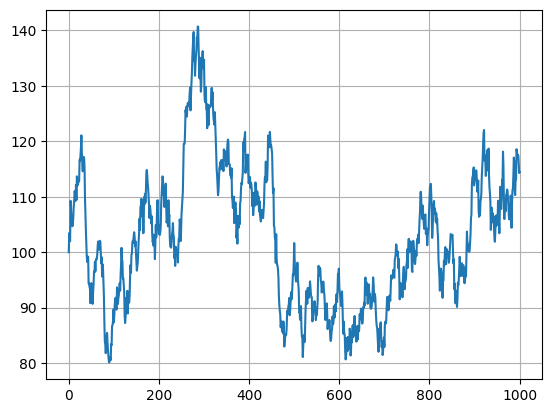

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# np.random.seed(0) # Utile pour la reproductibilité
daily_returns = np.random.normal(0.001, 0.02, 1000) # On génère ici 1000 retours quotidien en utilisant une loi normale de moyenne 0.001 et un écart type de 0.02
stock_prices = [100] # Prix du stock au jours 0
for r in daily_returns:
    stock_prices.append(stock_prices[-1] * (1+r)) # Pour chaque rendement quotidien r, on prends le dernier prix dans la liste stock_prices qu'on multiplie par (1+r) et qu'on ajoute à la liste stock_prices

print(f"{stock_prices[-1]:.2f}") # A la fin on regarde combien coûte l'action, le -1 sert à accéder au dernier élément de la liste 
plt.plot(stock_prices)
plt.grid(True)

### A RETENIR ICI ###
# Pour parcourir une liste en partant de la fin, il suffit juste de passer le nombre en négatif

### QUESTION : Pourquoi quand on augmente l'écart-type, le prix de l'action tend vers 0, et inversement

<span style="color:red"> **Exercice 2 : Portfolio Variance** </span>

<u> La Variance </u>
- Mesure statistique qui représente la dispersion des valeurs d'un ensemble de données. En gros, elle indique à quel point les valeurs de cet ensemble sont éloignées de la moyenne
- En finance, elle est souvent convertie en écart-type (racine carré de la variance) pour la rendre + interprétable, car l'écart type est exprimé dans les mêmes unités que les données originales

$$ \sigma_p^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_i \sigma_j \rho_{ij} $$

In [7]:
import numpy as np
import pandas as pd 

class Portfolio :
    def __init__ (self, weights, returns_data):
        self.weights = np.array(weights) # On convertit les poids données en un array numpy
        self.returns_data = pd.DataFrame(returns_data) # On convertit les données de rendement dans un DF
    
    def portfolio_variance(self):
        correlation_matrix = self.returns_data.corr() # 1. On utilise la méthode .corr de pandas pour obtenir la matrice de corrélation desnrendements
        std_devs = self.returns_data.std() # 2. Pareil mais pour la vol
        covariance_matrix = np.outer(std_devs, std_devs) * correlation_matrix.to_numpy() # 3. Calcul de la matrice de cov
        covariance_df = pd.DataFrame(covariance_matrix, index=self.returns_data.columns, columns=self.returns_data.columns) # DF Covariance pour une meilleure compréhension
        print("DataFrame de la matrice de covariance :")
        print(covariance_df)
        # np.outer -> calcule le produit extérieure de 2 vecteurs, par exemple pour [a, b] et [x, y] -> a*y ; b*x ; b*y etc...
        # correlation_matrix.to_numpy -> convertit la matrice de correlation pandas en un array numpy
        # Matrice de covariance = produit extérieur des écarts-type * matrice de corrélation
        portfolio_variance = np.dot(self.weights.T, np.dot(covariance_matrix, self.weights)) # Calcul de la variance
        # np.dot -> permet d'effectuer le produit scalaire de 2 tableaux
        return portfolio_variance
    
    # En gros ca donne :
    # 1. On mesure la corrélation entre les différents actifs du portefeuille
    # 2. On calcul la vol de chaque actifs
    # 3. On combine les deux informations pour obtenir la matrice de covariance, qui nous donne une idée de comment les actifs du portefeuille intéragissent entre eux
    # 4. On utilise le poids des différents actifs pour calculer la variance totale du portefeuille. On prends ces poinds et on les combine avec la matrice de covariance

returns_data = {
    'Asset_1': np.random.normal(0.001, 0.02, 100),  
    'Asset_2': np.random.normal(0.001, 0.02, 100)
}

weights = [0.6, 0.4]

# Création d'une instance de la classe Portfolio
my_portfolio = Portfolio(weights, returns_data)

variance = my_portfolio.portfolio_variance()
print(f"La variance du portefeuille est : {variance:.6f}")

### A RETENIR ICI ###
# - Un array en NumPy est une structure de données permettant de contenir des élements du même type, indexée par un tuple de N entiers positif
# Très utile pour effectuer des opérations mathématiques et pour manipuler les données


DataFrame de la matrice de covariance
          Asset_1   Asset_2
Asset_1  0.000502  0.000007
Asset_2  0.000007  0.000329
La variance du portefeuille est : 0.000237


<span style="color:red"> **Exercice 3 : The Efficient Frontier** </span>

In [10]:
import numpy as np

class Portfolio:
    def __init__(self, returns, volatilities): # Constructeur de classe
        # Conversion des listes de rendements et des vol en tableaux Numpy pour facilier les calculs
        self.returns = np.array(returns) 
        self.volatilities = np.array(volatilities)

    def portfolio_performance(self, num_portfolios=1000): # On définit la méthode pour calculerla performance du portefeuille
        # Initialisation de 3 listes vides pour stocker les data
        portfolio_returns = []
        portfolio_volatilities = []
        portfolio_weights = []
        
        for _ in range(num_portfolios):
            # _ est une "dummy variable" (quand on a pas l'intention d'utiliser la variable dans le corps de la boucle)
            # L'important ici n'est pas la variable elle-même, mais le nombre de portfolios
            weights = np.random.random(2)
            weights /= np.sum(weights)
            
            portfolio_return = np.dot(weights, self.returns) # Rendement = somme pondérée des rendement des actifs
            portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(np.diag(self.volatilities ** 2), weights)))
            # np.diag -> Créé une matrice diagonale, ici à partir des variances des actifs
            
            portfolio_returns.append(portfolio_return)
            portfolio_volatilities.append(portfolio_volatility)
            portfolio_weights.append(weights)
            # Ajout du rendement, de la volatilité, et des poids du portefeuille

        return portfolio_returns, portfolio_volatilities, portfolio_weights

returns = [0.10, 0.15]
volatilities = [0.20, 0.30]  
my_portfolio = Portfolio(returns, volatilities)
portfolio_returns, portfolio_volatilities, portfolio_weights = my_portfolio.portfolio_performance()
### En gros ici : ###
# - On définit les returns et la volatilité des 2 actifs
# - On définit my_portfolio, instance de la classe portfolio, avec les paramètres définit au dessus qui seront stocké dans les listes
# - Puis enfin, on appelle la fonction calculate_portfolio_performance avec 3 listes vides, qui a la fin de la fonction seront pleines

print("Sample de rendement et volatilité pour quelques combinaisons de poids :")
for i in range(0, len(portfolio_returns), 100): # La boucle for itère sur les index de i a 0, jusqu'à la longueur de portfolio_returns (donc 1000) avec un pas de 100
    # i -> variable temporaire (qui pourrait tout aussi bien être index, x, az) qui prends les valeurs de 0 jusqu'à la longueur de portfolio_returns
    # range(premier argument, valeur de fin, pas entre chaque itération)
    # len -> renvoie la longueur d'un objet
    weight_str = ", ".join([f"{w * 100:.2f}%" for w in portfolio_weights[i]]) # Mise en forme des returns
    # ", ".join -> joint les élements de la liste en une seule chaîne de caractère, en les séparant pour une virgule et un espace
    # le reste veut dire que pour chaque poids w dans la liste des poids, on le multiple par 100 puis formatage pour avoir 2 chiffres après la virgule
    print(f"Rendement : {portfolio_returns[i] * 100:.2f}% | Volatilité : {portfolio_volatilities[i] * 100:.2f}% | Poids : {weight_str}")


Sample de rendement et volatilité pour quelques combinaisons de poids :
Rendement : 12.20% | Volatilité : 17.31% | Poids : 56.02%, 43.98%
Rendement : 12.59% | Volatilité : 18.29% | Poids : 48.21%, 51.79%
Rendement : 13.57% | Volatilité : 22.17% | Poids : 28.59%, 71.41%
Rendement : 11.31% | Volatilité : 16.72% | Poids : 73.76%, 26.24%
Rendement : 12.66% | Volatilité : 18.51% | Poids : 46.73%, 53.27%
Rendement : 12.52% | Volatilité : 18.08% | Poids : 49.66%, 50.34%
Rendement : 12.39% | Volatilité : 17.73% | Poids : 52.23%, 47.77%
Rendement : 11.14% | Volatilité : 16.88% | Poids : 77.15%, 22.85%
Rendement : 11.87% | Volatilité : 16.81% | Poids : 62.64%, 37.36%
Rendement : 12.47% | Volatilité : 17.95% | Poids : 50.58%, 49.42%
